In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
data=pd.read_csv('/content/car_age_price.csv')
data

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000
...,...,...
107,2016,375000
108,2014,300000
109,2015,425000
110,2016,420000


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [27]:
data.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


# **`best linear relationship between year and price`**

Text(0.5, 1.0, 'Relation between Year and Price')

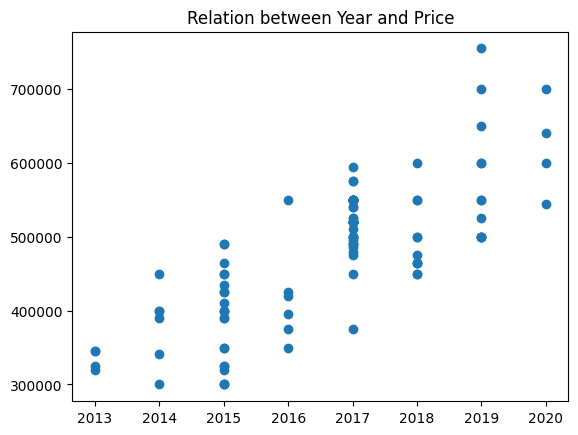

In [28]:
plt.scatter(x='Year',y='Price',data=data)
plt.title('Relation between Year and Price')

<Axes: >

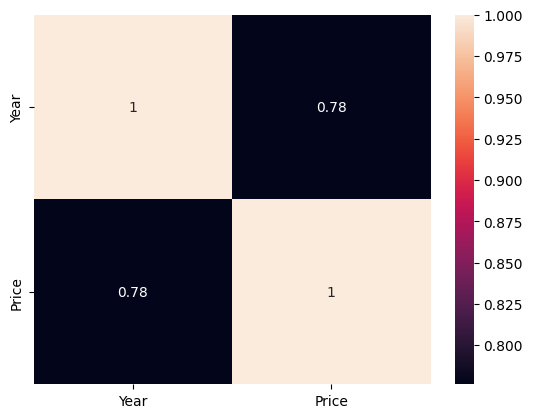

In [29]:
sns.heatmap(data.corr(),annot=True)

In [30]:
x=data.drop(['Price'], axis=1)
y =data['Price']

In [31]:
x

,Year
0,2018
1,2019
2,2019
3,2018
4,2018
...,...
107,2016
108,2014
109,2015
110,2016


In [32]:
y

0      465000
1      755000
2      700000
3      465000
4      465000
        ...  
107    375000
108    300000
109    425000
110    420000
111    425000
Name: Price, Length: 112, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.25)

In [34]:
from sklearn.linear_model import LinearRegression
lin_model = LinearRegression()

In [35]:
x_train_reshaped = np.array(x_train).reshape(-1, 1)
x_test_reshaped = np.array(x_test).reshape(-1, 1)
lin_model.fit(x_train_reshaped, y_train)
y_pred = lin_model.predict(x_test_reshaped)

In [44]:
from sklearn.metrics import mean_squared_error,r2_score
print('R squar value=:', r2_score(y_test,y_pred))

R squar value=: 0.4347961632108023


In [46]:
print("Mean Squared Error =",mean_squared_error(y_test,y_pred))

Mean Squared Error = 3878767151.073449


# **Predicting the price of the car in 2022**

In [38]:
new_data=np.array([[2022]])
lin_model.predict(new_data)

array([740160.11937766])

**Price of a 2022 model second-hand grand i10 is** 740160.11937766

# **Lasso Regression**

In [39]:
from sklearn.linear_model import Lasso

In [45]:
model_lasso = Lasso(alpha=0.01)
model_lasso.fit(x_train, y_train)
pred_test_lasso = model_lasso.predict(x_test)
print("Mean Squared Error =",np.sqrt(mean_squared_error(y_test,pred_test_lasso)))
print('R squared value =',r2_score(y_test, pred_test_lasso))

Mean Squared Error = 62279.74661573118
R squared value = 0.43479620875532277


# **Lasso regression performing better than linear regression because it have minimum Mean Square Value**